# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from requests.utils import requote_uri

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [3]:
#Save config Information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

url = base_url + f"appid={weather_api_key}&units={units}&q="
url

'http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q='

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# counter for City Index
count=1 
# Counter for number of sets to be created
sets =1 

#Intializing the lists to hold values
max_temp = []
city_name = []
city_lat = []
city_lng = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
country = []
city_date = []

print("Beginning Data Retrieval\n -----------------------------")

for city in cities:
    # Build Final query URL 
    final_url = requote_uri(f"{url}{city}")   
    
    #Make API calls to each city
    response = requests.get(final_url).json()
    print(final_url)
    
    print(f'Processing Record {count} of Set {sets} | {city}')
 
    #Since some data may be missing , use try-except to skip any that are missing a data point.
    try:       
        #Fetching 'weather data' from the 'json resonse' from the API call
        city_name.append(response['name'])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        print(response['main']['temp_max'])
        city_humidity.append(response['main']['humidity'])
        city_cloudiness.append(response['clouds']['all'])
        city_windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        city_date.append(response['dt'])                      
        
    except KeyError:
        print("City not found. Skipping...")
    count+=1  #increment city index after missing cities
    #Set counter for number of sets to return
    if count % 50 == 0:
        sets+=1

print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')   

Beginning Data Retrieval
 -----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=illoqqortoormiut
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=saint%20anthony
Processing Record 2 of Set 1 | saint anthony
5
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=ushuaia
Processing Record 3 of Set 1 | ushuaia
41
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=albany
Processing Record 4 of Set 1 | albany
32
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=necochea
Processing Record 5 of Set 1 | necochea
70
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=qaanaaq
Processing R

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=kaeo
Processing Record 52 of Set 2 | kaeo
69.01
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=tuktoyaktuk
Processing Record 53 of Set 2 | tuktoyaktuk
-29.2
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=cape%20town
Processing Record 54 of Set 2 | cape town
69.01
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=nizhneyansk
Processing Record 55 of Set 2 | nizhneyansk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=cidreira
Processing Record 56 of Set 2 | cidreira
65.84
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=port%20alfred
Processing Record 57 of Set 2 | port alfred
71.01
http://a

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=chokurdakh
Processing Record 103 of Set 3 | chokurdakh
-21.23
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=kerki
Processing Record 104 of Set 3 | kerki
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=lebu
Processing Record 105 of Set 3 | lebu
56.52
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=marcona
Processing Record 106 of Set 3 | marcona
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=tasiilaq
Processing Record 107 of Set 3 | tasiilaq
26.6
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=sitka
Processing Record 108 of Set 3 | sitka
35.6
http://api.open

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=whitefish
Processing Record 154 of Set 4 | whitefish
26.6
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=darhan
Processing Record 155 of Set 4 | darhan
10.56
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=arkhangelos
Processing Record 156 of Set 4 | arkhangelos
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=namibe
Processing Record 157 of Set 4 | namibe
69.91
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=the%20valley
Processing Record 158 of Set 4 | the valley
77
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=yamethin
Processing Record 159 of Set 4 | yamethin
90.1
http://api.openwe

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=aleksandrovskiy%20zavod
Processing Record 206 of Set 5 | aleksandrovskiy zavod
5.18
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=straumen
Processing Record 207 of Set 5 | straumen
19
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=san%20cristobal
Processing Record 208 of Set 5 | san cristobal
67.5
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=boo
Processing Record 209 of Set 5 | boo
15.01
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=saleaula
Processing Record 210 of Set 5 | saleaula
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=sinobong
Processing Record 211 of Set 5 | sinobong

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=vila%20velha
Processing Record 257 of Set 6 | vila velha
78.8
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=port%20lincoln
Processing Record 258 of Set 6 | port lincoln
66.97
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=zhezkazgan
Processing Record 259 of Set 6 | zhezkazgan
29.05
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=danane
Processing Record 260 of Set 6 | danane
73.9
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=bolungarvik
Processing Record 261 of Set 6 | bolungarvik
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=mananjary
Processing Record 262 of Set 6 | mananjary
83

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=kangavar
Processing Record 309 of Set 7 | kangavar
41
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=mariinskiy%20posad
Processing Record 310 of Set 7 | mariinskiy posad
6.8
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=saint-francois
Processing Record 311 of Set 7 | saint-francois
44.01
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=rungata
Processing Record 312 of Set 7 | rungata
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=narsaq
Processing Record 313 of Set 7 | narsaq
15.8
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=kahului
Processing Record 314 of Set 7 | kahului
69.8
htt

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=hofn
Processing Record 360 of Set 8 | hofn
36.82
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=luderitz
Processing Record 361 of Set 8 | luderitz
69.78
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=burayevo
Processing Record 362 of Set 8 | burayevo
20.53
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=evensk
Processing Record 363 of Set 8 | evensk
-2.9
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=cockburn%20town
Processing Record 364 of Set 8 | cockburn town
76.93
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=sao%20filipe
Processing Record 365 of Set 8 | sao filipe
68.74
http://api.openweathermap.org/data/

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=cesis
Processing Record 412 of Set 9 | cesis
0
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=formoso%20do%20araguaia
Processing Record 413 of Set 9 | formoso do araguaia
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=buraydah
Processing Record 414 of Set 9 | buraydah
53.6
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=esil
Processing Record 415 of Set 9 | esil
33.19
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=paamiut
Processing Record 416 of Set 9 | paamiut
21.52
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=tomatlan
Processing Record 417 of Set 9 | tomatlan
69.49
http://api.op

Processing Record 464 of Set 10 | calabozo
76.89
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=bafilo
Processing Record 465 of Set 10 | bafilo
67.28
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=auki
Processing Record 466 of Set 10 | auki
84
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=flin%20flon
Processing Record 467 of Set 10 | flin flon
-27.65
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=vila%20do%20maio
Processing Record 468 of Set 10 | vila do maio
68
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=saint-leu
Processing Record 469 of Set 10 | saint-leu
82.99
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=mahibadhoo
Processing Record 470 of Set 10

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=male
Processing Record 515 of Set 11 | male
86
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=kuroiso
Processing Record 516 of Set 11 | kuroiso
51.8
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=mareeba
Processing Record 517 of Set 11 | mareeba
89.01
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=ayagoz
Processing Record 518 of Set 11 | ayagoz
28.06
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=kulhudhuffushi
Processing Record 519 of Set 11 | kulhudhuffushi
82.29
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=dzaoudzi
Processing Record 520 of Set 11 | dzaoudzi
82.4
http://api.openweathermap.org/data/2.5/weat

http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=puerto%20narino
Processing Record 567 of Set 12 | puerto narino
73.4
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=owen%20sound
Processing Record 568 of Set 12 | owen sound
18
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=bontang
Processing Record 569 of Set 12 | bontang
82.99
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=maromitsa
Processing Record 570 of Set 12 | maromitsa
-3.33
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=alugan
Processing Record 571 of Set 12 | alugan
82.99
http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=rundu
Processing Record 572 of Set 12 | rundu
71.02
http://api.openweathermap.org/

In [40]:
url = "http://api.openweathermap.org/data/2.5/weather?appid=93320ab6a8ae11874bca7b795a03a2c9&units=imperial&q=Várzea da Palma"
r= requests.get(url).json()
temp = r['main']['temp_max']
temp

70.83

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data = pd.DataFrame({
                            "City":city_name,
                            "Lat":city_lat,
                            "Lng":city_lng,
                            "Max Temp(F)":max_temp,
                            "Humidity":city_humidity,
                            "Cloudiness":city_cloudiness,
                            "Wind Speed":city_windspeed,
                            "Country":country,
                            "Date":city_date
                            })

#Save data in .csv file format
city_data.to_csv("Output_data/Airport_Output.csv" , index=False , encoding="utf-8")

#Displaying the Data
city_data

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint Anthony,45.0205,-93.2180,5.00,66,1,11.50,US,1612589620
1,Ushuaia,-54.8000,-68.3000,41.00,93,75,17.27,AR,1612589546
2,Albany,42.6001,-73.9662,32.00,80,75,9.22,US,1612589405
3,Necochea,-38.5473,-58.7368,70.00,57,0,15.37,AR,1612589620
4,Qaanaaq,77.4840,-69.3632,0.86,79,100,7.94,GL,1612589620
...,...,...,...,...,...,...,...,...,...
543,Caratinga,-19.7897,-42.1392,69.82,95,100,1.95,BR,1612589751
544,Balkanabat,39.5108,54.3671,52.36,63,100,7.31,TM,1612589751
545,Tieli,46.9500,128.0500,5.45,88,31,7.54,CN,1612589751
546,Keti Bandar,24.1447,67.4497,77.86,19,0,6.04,PK,1612589752


In [7]:
#Statistical Analysis of city data
round(city_data.describe(),2)

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,548.00,548.00,548.00,548.00,548.00,548.00,5.480000e+02
mean,19.87,20.66,50.37,73.27,53.55,7.95,1.612590e+09
std,33.54,91.79,31.61,19.94,38.97,5.30,7.891000e+01
min,-54.80,-179.17,-38.20,12.00,0.00,0.36,1.612589e+09
25%,-9.12,-59.21,31.45,64.00,13.75,3.83,1.612590e+09
50%,23.25,25.42,60.80,78.00,60.50,6.54,1.612590e+09
75%,48.03,102.85,75.86,88.00,90.00,11.28,1.612590e+09
max,78.22,178.42,95.00,100.00,100.00,31.07,1.612590e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#Finding rows with humity value greater than 100
Humidity_over100_df = city_data[city_data['Humidity']>100]
Humidity_over100_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date


##### Note: There are no cities with Humidy greater than 100%

In [9]:
#  Get the indices of cities that have humidity over 100%.
# Only if there are cities with humidy > 100%
index = Humidity_over100_df.index
index

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(index , inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint Anthony,45.0205,-93.2180,5.00,66,1,11.50,US,1612589620
1,Ushuaia,-54.8000,-68.3000,41.00,93,75,17.27,AR,1612589546
2,Albany,42.6001,-73.9662,32.00,80,75,9.22,US,1612589405
3,Necochea,-38.5473,-58.7368,70.00,57,0,15.37,AR,1612589620
4,Qaanaaq,77.4840,-69.3632,0.86,79,100,7.94,GL,1612589620
...,...,...,...,...,...,...,...,...,...
543,Caratinga,-19.7897,-42.1392,69.82,95,100,1.95,BR,1612589751
544,Balkanabat,39.5108,54.3671,52.36,63,100,7.31,TM,1612589751
545,Tieli,46.9500,128.0500,5.45,88,31,7.54,CN,1612589751
546,Keti Bandar,24.1447,67.4497,77.86,19,0,6.04,PK,1612589752


In [11]:
#Statistical Analysis of dropped data set (in case there are outliers)
round(clean_city_data.describe(),2)

,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Date
count,548.00,548.00,548.00,548.00,548.00,548.00,5.480000e+02
mean,19.87,20.66,50.37,73.27,53.55,7.95,1.612590e+09
std,33.54,91.79,31.61,19.94,38.97,5.30,7.891000e+01
min,-54.80,-179.17,-38.20,12.00,0.00,0.36,1.612589e+09
25%,-9.12,-59.21,31.45,64.00,13.75,3.83,1.612590e+09
50%,23.25,25.42,60.80,78.00,60.50,6.54,1.612590e+09
75%,48.03,102.85,75.86,88.00,90.00,11.28,1.612590e+09
max,78.22,178.42,95.00,100.00,100.00,31.07,1.612590e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

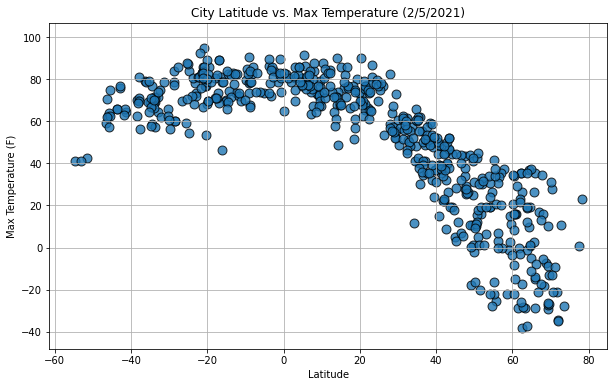

<Figure size 432x288 with 0 Axes>

In [12]:
# Function to Plot Scatter 
def Scatterplot(x,y,title,ylabel,i,j):
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, alpha=.8, s=80, edgecolor="black")
    plt.grid()
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim(min(y)-i,max(y)+j)
    plt.show()
    plt.tight_layout()

#Set current date for title
date = '2/5/2021'    

#Set X-Axis and Y-axis for plotting    
x_axis = clean_city_data["Lat"]
y_axis_temp = clean_city_data["Max Temp(F)"]

#Set Title
title = f"City Latitude vs. Max Temperature ({date})"
y_label_T = "Max Temperature (F)"

#Set ylim minimum
ymin = 10
ymax = 12

#Call the function for plotting
scatterplot_Lat_Temp =  Scatterplot(x_axis,y_axis_temp ,title,y_label_T,ymin,ymax)   


## Latitude vs. Humidity Plot

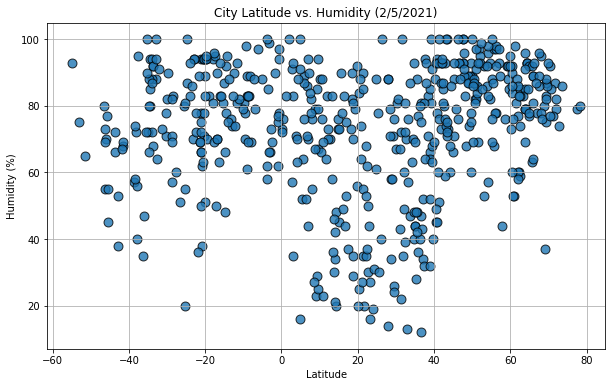

<Figure size 432x288 with 0 Axes>

In [13]:
#Since X-Axis is already set, get Y-axis values for plotting  
y_axis_Humidity = clean_city_data["Humidity"]

#Set Title and Label
title_H = f"City Latitude vs. Humidity ({date})"
y_label_H = "Humidity (%)"
#Set ylim minimum
ymin_H = 5
ymax_H = 5
#Call the function for plotting
scatterplot_Lat_Humi =  Scatterplot(x_axis, y_axis_Humidity , title_H, y_label_H, ymin_H, ymax_H)  

## Latitude vs. Cloudiness Plot

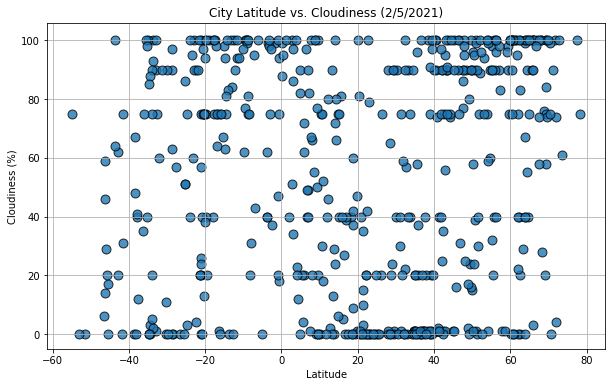

<Figure size 432x288 with 0 Axes>

In [14]:
#Since X-Axis is already set, get Y-axis values for plotting 
y_axis_cloud = clean_city_data["Cloudiness"]

#Set Title and Label
title_C = f"City Latitude vs. Cloudiness ({date})"
y_label_C= "Cloudiness (%)"
#Set ylim minimum
ymin_C = 5
ymax_C = 6
#Call the function for plotting
scatterplot_Lat_Humi =  Scatterplot(x_axis, y_axis_cloud , title_C, y_label_C, ymin_C, ymax_C)  

## Latitude vs. Wind Speed Plot

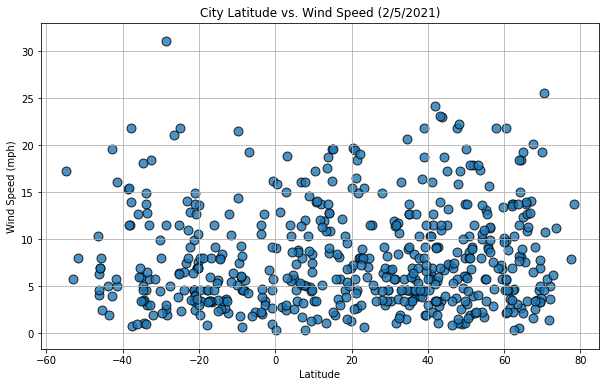

<Figure size 432x288 with 0 Axes>

In [15]:
#Since X-Axis is already set, get Y-axis values for plotting 
y_axis_wind = clean_city_data["Wind Speed"]

#Set Title and Label
title_W = f"City Latitude vs. Wind Speed ({date})"
y_label_W= "Wind Speed (mph)"
#Set ylim minimum
ymin_W = 2
ymax_W = 2

#Call the function for plotting
scatterplot_Lat_Wind =  Scatterplot(x_axis, y_axis_wind , title_W, y_label_W, ymin_W, ymax_W)  

## Linear Regression

In [16]:
#Find data for Northern Hemisphere
Northern_hemisphere_df = clean_city_data.loc[clean_city_data["Lat"]>=0 , :]
#Northern Hemisphere Temperature data points
Northern_hemisphere_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint Anthony,45.0205,-93.2180,5.00,66,1,11.50,US,1612589620
2,Albany,42.6001,-73.9662,32.00,80,75,9.22,US,1612589405
4,Qaanaaq,77.4840,-69.3632,0.86,79,100,7.94,GL,1612589620
6,Cherskiy,68.7500,161.3000,-7.29,80,76,3.51,RU,1612589621
7,Yermekeyevo,54.0761,53.6712,19.18,96,100,10.02,RU,1612589621
...,...,...,...,...,...,...,...,...,...
541,Tura,25.5198,90.2201,78.46,30,0,5.12,IN,1612589751
544,Balkanabat,39.5108,54.3671,52.36,63,100,7.31,TM,1612589751
545,Tieli,46.9500,128.0500,5.45,88,31,7.54,CN,1612589751
546,Keti Bandar,24.1447,67.4497,77.86,19,0,6.04,PK,1612589752


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

##### Function to calculate Linar regression values:

In [17]:
#Calculate and Run Linear Regression 
def linarequation(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return rvalue , line_eq , regress_values

##### Note: Function to plot scatter with LR equation

In [18]:
#Scatter plot with LR equation
def LR_Scatterplot(x, y, reg_value,line_eq, title, ylabel, ymin, ymax, lmin, lmax):
    plt.figure(figsize=(10,6))
    plt.scatter(x,y , alpha=.8, s=80, edgecolor="black")
    plt.plot(x,reg_value,"r-")
    plt.annotate(line_eq,(lmin,max(y)+lmax),fontsize=20,color="red")
    plt.title(title, fontsize = 16 , color ='black')
    plt.ylim(min(y) -ymin, max(y) +ymax)
    plt.xlabel("Latitude" , fontsize = 14 ,color ='black')
    plt.ylabel(ylabel , fontsize = 14 , color ='black')
    plt.show()
    plt.tight_layout()

In [19]:
# Find X_Axis and Y_Axis values
x_axis_northern = Northern_hemisphere_df['Lat']
y_axis_northern = Northern_hemisphere_df['Max Temp(F)']

#Call function to calculate Line equation and R vlaue
rvalue_NT , line_eq_NT, regress_values_NT= linarequation(x_axis_northern,y_axis_northern)

#Print values to display
print(f'Linear R Equation : {line_eq_NT}')
print(f"The r-value is: {round(rvalue_NT**2,2)}")

Linear R Equation : y = -1.41x + 94.33
The r-value is: 0.77


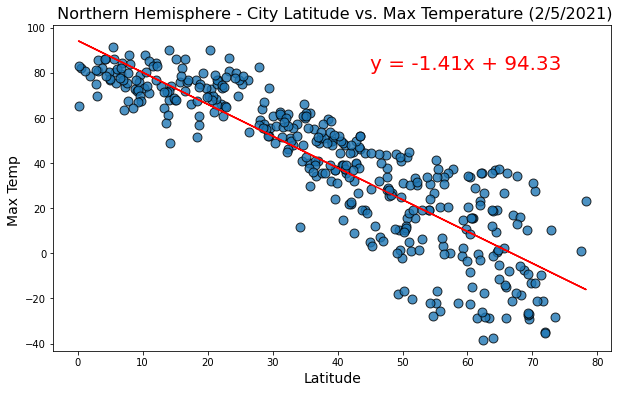

<Figure size 432x288 with 0 Axes>

In [20]:
#plotting scatter Northern Hemisphere - Max Temp vs. Latitude Linear Regression
#Set Title and Label for the pLot    
title_NT = f" Northern Hemisphere - City Latitude vs. Max Temperature ({date})"
ylabel_NT = "Max Temp "

#Set ylim minimum
ymin_NT = 5
ymax_NT = 10

#set annotation limit
lmin_NT =45
lmax_NT =-10

#Call the function for plotting
scatterplot_NH_Temp =  LR_Scatterplot(x_axis_northern, 
                                      y_axis_northern , 
                                      regress_values_NT, 
                                      line_eq_NT,
                                      title_NT, 
                                      ylabel_NT, 
                                      ymin_NT, ymax_NT,
                                      lmin_NT,lmax_NT)  


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
#Find data for Southern Hemisphere
Southern_hemisphere_df = clean_city_data.loc[clean_city_data["Lat"]<0 , :]
#Southern Hemisphere Temperature data points
Southern_hemisphere_df

,City,Lat,Lng,Max Temp(F),Humidity,Cloudiness,Wind Speed,Country,Date
1,Ushuaia,-54.8000,-68.3000,41.00,93,75,17.27,AR,1612589546
3,Necochea,-38.5473,-58.7368,70.00,57,0,15.37,AR,1612589620
5,Castro,-24.7911,-50.0119,54.72,87,3,2.39,BR,1612589620
8,Vaini,-21.2000,-175.2000,80.60,94,75,4.61,TO,1612589621
13,Saldanha,-33.0117,17.9442,64.40,88,1,11.50,ZA,1612589622
...,...,...,...,...,...,...,...,...,...
536,Antalaha,-14.9003,50.2788,83.89,66,63,2.37,MG,1612589750
537,Labuhan,-6.8844,112.2051,83.26,79,43,19.28,ID,1612589750
540,Várzea da Palma,-17.5981,-44.7308,71.29,96,100,3.33,BR,1612589751
542,Uyuni,-20.4597,-66.8250,53.46,63,97,3.65,BO,1612589751


In [22]:
# Find X_Axis and Y_Axis values
x_axis_South = Southern_hemisphere_df['Lat']
y_axis_South = Southern_hemisphere_df['Max Temp(F)']

#Call function to calculate Line equation and R vlaue
rvalue_ST , line_eq_ST ,regress_values_ST = linarequation(x_axis_South,y_axis_South)

#Print values to display
print(f'Linear R Equation : {line_eq_ST}')
print(f"The r-value is: {round(rvalue_ST**2,2)}")

Linear R Equation : y = 0.43x + 83.82
The r-value is: 0.31


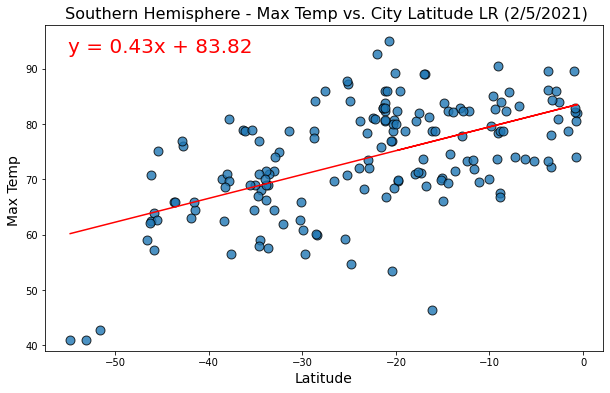

<Figure size 432x288 with 0 Axes>

In [23]:
#plotting scatter Southern Hemisphere - Max Temp vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_ST = f" Southern Hemisphere - Max Temp vs. City Latitude LR ({date})"
ylabel_ST = "Max Temp "

#Set ylim minimum
ymin_ST = 2
ymax_ST = 3

#set annotation limit
lmin_ST =-55
lmax_ST =-2

#Call the function for plotting
scatterplot_SH_Temp =  LR_Scatterplot(x_axis_South, 
                                      y_axis_South , 
                                      regress_values_ST, 
                                      line_eq_ST,
                                      title_ST, 
                                      ylabel_ST, 
                                      ymin_ST, ymax_ST,
                                      lmin_ST , lmax_ST )  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
# Find X_Axis and Y_Axis values
x_axis_NH_Humid = Northern_hemisphere_df['Lat']
y_axis_NH_humid = Northern_hemisphere_df['Humidity']

#Call function to calculate Line equation and R vlaue
rvalue_N_Humid , line_eq_N_Humid, regress_values_N_Humid= linarequation(x_axis_NH_Humid,y_axis_NH_humid)

#Print values to display
print(f'Linear R Equation : {line_eq_N_Humid}')
print(f"The r-value is: {round(rvalue_N_Humid**2,2)}")

Linear R Equation : y = 0.39x + 56.86
The r-value is: 0.13


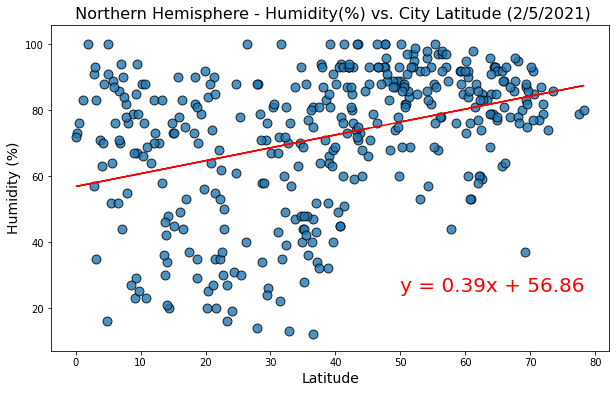

<Figure size 432x288 with 0 Axes>

In [25]:
#plotting scatter Northern Hemisphere - Humidity (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_NHumid = f" Northern Hemisphere - Humidity(%) vs. City Latitude ({date})"
ylabel_NHumid = "Humidity (%)"

#Set ylim minimum
ymin_NHumid = 5
ymax_NHumid = 6

#set annotation limit
lmin_NHumid =50
lmax_NHumid =-75

#Call the function for plotting
scatterplot_N_Humid =  LR_Scatterplot(x_axis_NH_Humid, 
                                      y_axis_NH_humid , 
                                      regress_values_N_Humid, 
                                      line_eq_N_Humid,
                                      title_NHumid, 
                                      ylabel_NHumid, 
                                      ymin_NHumid, ymax_NHumid,
                                      lmin_NHumid , lmax_NHumid )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [26]:
# Find X_Axis and Y_Axis values
x_axis_SH_Humid = Southern_hemisphere_df['Lat']
y_axis_SH_humid = Southern_hemisphere_df['Humidity']

#Call function to calculate Line equation and R vlaue
rvalue_S_Humid , line_eq_S_Humid, regress_values_S_Humid= linarequation(x_axis_SH_Humid, y_axis_SH_humid)

#Print values to display
print(f'Linear R Equation : {line_eq_S_Humid}')
print(f"The r-value is: {round(rvalue_S_Humid**2,2)}")

Linear R Equation : y = 0.27x + 82.44
The r-value is: 0.05


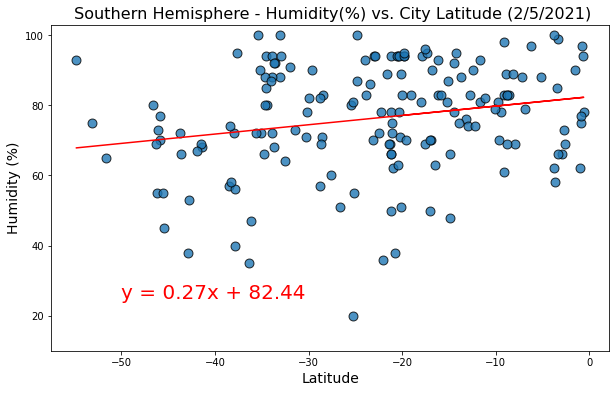

<Figure size 432x288 with 0 Axes>

In [27]:
#plotting scatter Southern Hemisphere - Humidity (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_SHumid = f" Southern Hemisphere - Humidity(%) vs. City Latitude ({date})"
ylabel_SHumid = "Humidity (%)"

#Set ylim minimum
ymin_SHumid = 10
ymax_SHumid = 3

#set annotation limit
lmin_SHumid =-50
lmax_SHumid =-75

#Call the function for plotting
scatterplot_S_Humid =  LR_Scatterplot(x_axis_SH_Humid, 
                                      y_axis_SH_humid , 
                                      regress_values_S_Humid, 
                                      line_eq_S_Humid,
                                      title_SHumid, 
                                      ylabel_SHumid, 
                                      ymin_SHumid, ymax_SHumid,
                                      lmin_SHumid , lmax_SHumid )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [28]:
# Find X_Axis and Y_Axis values
x_axis_NH_cloud = Northern_hemisphere_df['Lat']
y_axis_NH_cloud = Northern_hemisphere_df['Cloudiness']

#Call function to calculate Line equation and R vlaue
rvalue_N_cloud , line_eq_N_cloud, regress_values_N_cloud= linarequation(x_axis_NH_cloud,y_axis_NH_cloud)

#Print values to display
print(f'Linear R Equation : {line_eq_N_cloud}')
print(f"The r-value is: {round(rvalue_N_cloud**2,2)}")

Linear R Equation : y = 0.55x + 30.12
The r-value is: 0.08


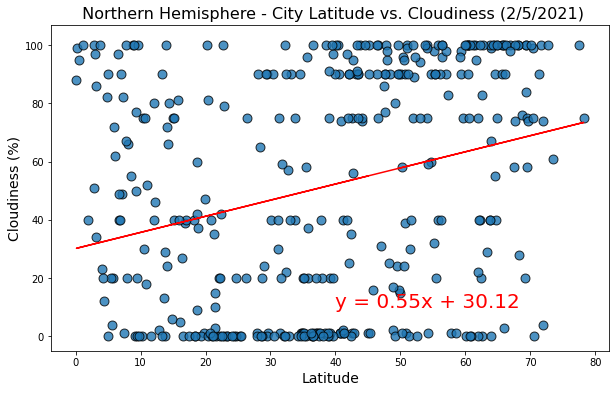

<Figure size 432x288 with 0 Axes>

In [29]:
#plotting scatter Northern Hemisphere - Cloudiness (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Ncloud = f" Northern Hemisphere - City Latitude vs. Cloudiness ({date})"
ylabel_Ncloud = "Cloudiness (%)"

#Set ylim minimum
ymin_Ncloud = 5
ymax_Ncloud = 7

#set annotation limit
lmin_Ncloud = 40
lmax_Ncloud =-90

#Call the function for plotting
scatterplot_N_cloud =  LR_Scatterplot(x_axis_NH_cloud, 
                                      y_axis_NH_cloud , 
                                      regress_values_N_cloud, 
                                      line_eq_N_cloud,
                                      title_Ncloud, 
                                      ylabel_Ncloud, 
                                      ymin_Ncloud, ymax_Ncloud,
                                      lmin_Ncloud , lmax_Ncloud )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
# Find X_Axis and Y_Axis values
x_axis_SH_cloud = Southern_hemisphere_df['Lat']
y_axis_SH_cloud = Southern_hemisphere_df['Cloudiness']

#Call function to calculate Line equation and R vlaue
rvalue_S_cloud , line_eq_S_cloud, regress_values_S_cloud = linarequation(x_axis_SH_cloud, y_axis_SH_cloud)

#Print values to display
print(f'Linear R Equation : {line_eq_S_cloud}')
print(f"The r-value is: {round(rvalue_S_cloud**2,2)}")

Linear R Equation : y = 0.96x + 80.4
The r-value is: 0.11


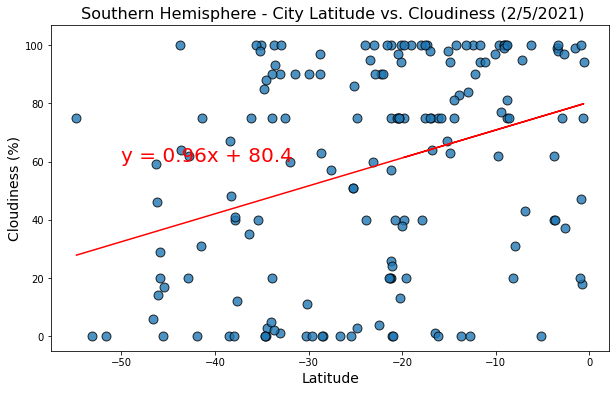

<Figure size 432x288 with 0 Axes>

In [31]:
#plotting scatter Southern Hemisphere - Cloudiness (%) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Scloud = f" Southern Hemisphere - City Latitude vs. Cloudiness ({date})"
ylabel_Scloud = "Cloudiness (%)"

#Set ylim minimum
ymin_Scloud = 5
ymax_Scloud = 7

#set annotation limit
lmin_Scloud = -50
lmax_Scloud =-40

#Call the function for plotting
scatterplot_S_cloud =  LR_Scatterplot(x_axis_SH_cloud, 
                                      y_axis_SH_cloud , 
                                      regress_values_S_cloud, 
                                      line_eq_S_cloud,
                                      title_Scloud, 
                                      ylabel_Scloud, 
                                      ymin_Scloud, ymax_Scloud,
                                      lmin_Scloud , lmax_Scloud )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [32]:
# Find X_Axis and Y_Axis values
x_axis_NH_wind = Northern_hemisphere_df['Lat']
y_axis_NH_wind= Northern_hemisphere_df['Wind Speed']

#Call function to calculate Line equation and R vlaue
rvalue_N_wind , line_eq_N_wind, regress_values_N_wind= linarequation(x_axis_NH_wind,y_axis_NH_wind)

#Print values to display
print(f'Linear R Equation : {line_eq_N_wind}')
print(f"The r-value is: {round(rvalue_N_wind**2,4)}")

Linear R Equation : y = 0.01x + 8.05
The r-value is: 0.0004


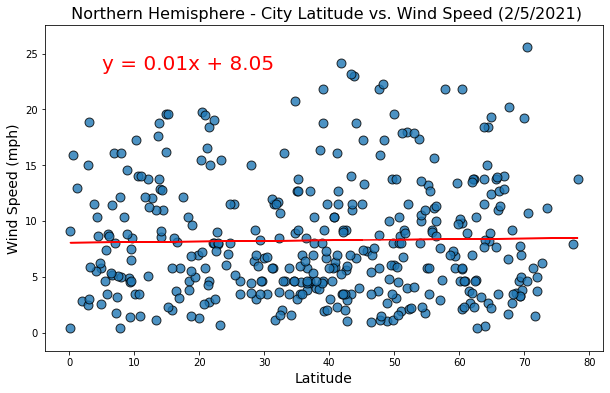

<Figure size 432x288 with 0 Axes>

In [33]:
#plotting scatter Northern Hemisphere - Wind Speed  (mph) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Nwind = f" Northern Hemisphere - City Latitude vs. Wind Speed ({date})"
ylabel_Nwind = "Wind Speed (mph)"

#Set ylim minimum
ymin_Nwind = 2
ymax_Nwind = 2

#set annotation limit
lmin_Nwind = 5
lmax_Nwind =-2

#Call the function for plotting
scatterplot_N_wind =  LR_Scatterplot(x_axis_NH_wind, 
                                      y_axis_NH_wind , 
                                      regress_values_N_wind, 
                                      line_eq_N_wind,
                                      title_Nwind, 
                                      ylabel_Nwind, 
                                      ymin_Nwind, ymax_Nwind,
                                      lmin_Nwind , lmax_Nwind )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [34]:
# Find X_Axis and Y_Axis values
x_axis_SH_Wind = Southern_hemisphere_df['Lat']
y_axis_SH_Wind = Southern_hemisphere_df['Wind Speed']

#Call function to calculate Line equation and R vlaue
rvalue_S_Wind , line_eq_S_Wind, regress_values_S_Wind = linarequation(x_axis_SH_Wind, y_axis_SH_Wind)

#Print values to display
print(f'Linear R Equation : {line_eq_S_Wind}')
print(f"The r-value is: {round(rvalue_S_Wind**2,2)}")

Linear R Equation : y = -0.06x + 5.86
The r-value is: 0.02


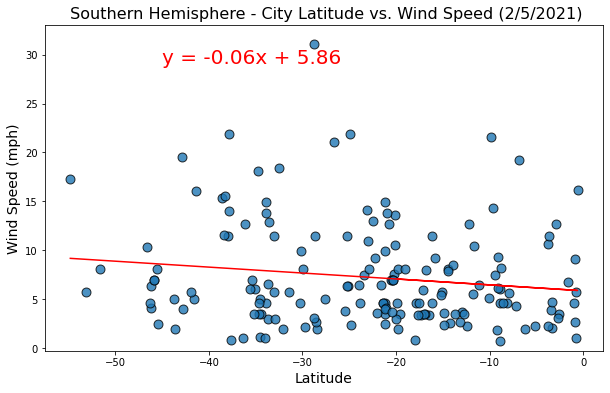

<Figure size 432x288 with 0 Axes>

In [35]:
#plotting scatter Southern Hemisphere - Wind Speed  (mph) vs. Latitude with Linear Regression
#Set Title and Label for the pLot  
title_Swind = f" Southern Hemisphere - City Latitude vs. Wind Speed ({date})"
ylabel_Swind = "Wind Speed (mph)"

#Set ylim minimum
ymin_Swind = 1
ymax_Swind = 2

#set annotation limit
lmin_Swind = -45
lmax_Swind =-2

#Call the function for plotting
scatterplot_S_wind =  LR_Scatterplot(x_axis_SH_Wind, 
                                      y_axis_SH_Wind , 
                                      regress_values_S_Wind, 
                                      line_eq_S_Wind,
                                      title_Swind, 
                                      ylabel_Swind, 
                                      ymin_Swind, ymax_Swind,
                                      lmin_Swind , lmax_Swind )